In [94]:
import pandas as pd

In [95]:
import numpy as np

In [96]:
import re

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error,mean_absolute_error

In [98]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [99]:
pd.set_option('display.max_columns', None)

In [100]:
df=pd.read_csv('laptop_price.csv', sep=',', encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD


In [101]:
set(df['Karta Graficzna'])

{'AMD FirePro',
 'AMD R',
 'AMD Radeon',
 'Intel Graphics',
 'Intel HD',
 'Intel Iris',
 'Intel UHD',
 'Nvidia GTX',
 'Nvidia GeForce',
 'Nvidia Quadro'}

In [102]:
df['Karta_Graficzna'] = [1 if df['Karta Graficzna'][i] == 'Amd FirePro' 
                         else 2 if df['Karta Graficzna'][i] == 'AMD R'
                         else 3 if df['Karta Graficzna'][i] == 'AMD Radeon'
                         else 4 if df['Karta Graficzna'][i] == 'Intel Graphics'
                         else 5 if df['Karta Graficzna'][i] == 'Intel HD'
                         else 6 if df['Karta Graficzna'][i] == 'Intel Iris'
                         else 7 if df['Karta Graficzna'][i] == 'Intel UHD'
                         else 8 if df['Karta Graficzna'][i] == 'Nvidia GTX'
                         else 9 if df['Karta Graficzna'][i] == 'Nvidia GeForce'
                         else 10 
                         for i in range(len(df))]

In [103]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6


In [104]:
set(df['Procesor'])

{'AMD FX',
 'AMD Ryzen',
 'AMD Series',
 'Intel',
 'Intel Core-i3',
 'Intel Core-i5',
 'Intel Core-i7',
 'Intel Xeon'}

In [105]:
df['procesor'] = [1 if df['Procesor'][i] == 'AMD FX' 
                 else 2 if df['Procesor'][i] == 'AMD Ryzen'
                 else 3 if df['Procesor'][i] == 'AMD Series'
                 else 4 if df['Procesor'][i] == 'Intel'
                 else 5 if df['Procesor'][i] == 'Intel Core-i3'
                 else 6 if df['Procesor'][i] == 'Intel Core-i5'
                 else 7 if df['Procesor'][i] == 'Intel Core-i7'
                 else 8 
                 for i in range(len(df))]

In [106]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6


In [107]:
set(df['procesor'])

{1, 2, 3, 4, 5, 6, 7, 8}

In [108]:
set(df['Memory_type'])

{'Flash_Storage', 'HDD', 'Hybrid', 'SSD'}

In [109]:
df['memory_type'] = [1 if df['Memory_type'][i] == 'Flash_Storage' 
                 else 2 if df['Memory_type'][i] == 'HDD'
                 else 3 if df['Memory_type'][i] == 'Hybrid'
                 else 4 
                 for i in range(len(df))]

In [110]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4


In [111]:
set(df['TypeName'])

{'2 in 1 Convertible',
 'Gaming',
 'Netbook',
 'Notebook',
 'Ultrabook',
 'Workstation'}

In [112]:
df['type_name'] = [1 if df['TypeName'][i] == '2 in 1 Convertible' 
                 else 2 if df['TypeName'][i] == 'Gaming'
                 else 3 if df['TypeName'][i] == 'Netbook'
                 else 4 if df['TypeName'][i] == 'Notebook'
                 else 5 if df['TypeName'][i] == 'Ultrabook'
                 else 6
                 for i in range(len(df))]

In [113]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5


In [114]:
df.describe()

,laptop_ID,Inches,RamGB,Weight,Price_euros,TaktGHz,Memory,Karta_Graficzna,procesor,memory_type,type_name
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,659.734255,15.019278,8.385561,2.039416,1124.043894,2.299002,594.347158,6.115207,5.927035,2.954685,3.584485
std,381.014613,1.424861,5.085166,0.665274,699.158856,0.506467,445.630603,2.178562,1.205314,1.068135,1.243648
min,1.000000,10.100000,2.000000,0.690000,174.000000,0.900000,8.000000,2.000000,1.000000,1.000000,1.000000
25%,331.250000,14.000000,4.000000,1.500000,599.000000,2.000000,256.000000,5.000000,5.000000,2.000000,3.000000
50%,658.500000,15.600000,8.000000,2.040000,978.000000,2.500000,500.000000,5.000000,6.000000,3.000000,4.000000
75%,989.750000,15.600000,8.000000,2.300000,1488.435000,2.700000,1024.000000,9.000000,7.000000,4.000000,4.000000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000,3.600000,2560.000000,10.000000,8.000000,4.000000,6.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   Product           1300 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1302 non-null   object 
 6   RamGB             1302 non-null   int64  
 7   OpSys             1302 non-null   object 
 8   Weight            1302 non-null   float64
 9   Price_euros       1302 non-null   float64
 10  Procesor          1302 non-null   object 
 11  TaktGHz           1302 non-null   float64
 12  Karta Graficzna   1302 non-null   object 
 13  Memory            1302 non-null   int64  
 14  Memory_type       1302 non-null   object 
 15  Karta_Graficzna   1302 non-null   int64  
 16  procesor          1302 non-null   int64  


In [116]:
set(df['RamGB'])

{2, 4, 6, 8, 12, 16, 24, 32, 64}

In [117]:
df['RamGB'].dtype

dtype('int64')

In [118]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5


In [119]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [120]:
#df['Weight1'] = df['Weight'].replace(['kg'],[''], regex=True)

In [121]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5


In [122]:
#df['Cpu'].value_counts()

In [123]:
company = pd.get_dummies(df['Company'])
company

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

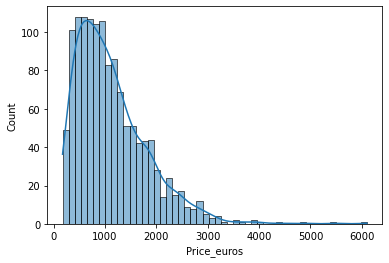

In [124]:
sns.histplot(df['Price_euros'], kde = True, bins=50)

In [125]:
z = [np.log(df['Price_euros'])]
z

[0       7.200194
 1       6.801216
 2       6.354370
 3       7.838915
 4       7.497540
           ...   
 1297    6.458338
 1298    7.312553
 1299    5.433722
 1300    6.638568
 1301    5.910797
 Name: Price_euros, Length: 1302, dtype: float64]

<AxesSubplot:ylabel='Count'>

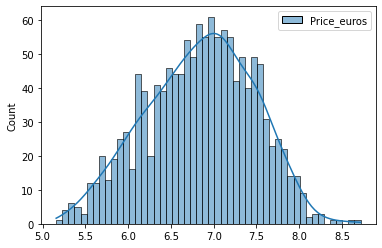

In [126]:
sns.histplot(z, kde = True, bins=50)

In [127]:
df['Price'] = np.log(df['Price_euros'])

In [128]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5,7.200194
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5,6.801216
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4,6.354370
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5,7.838915
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5,7.497540


In [129]:
df = pd.concat([df, company], axis=1)

In [130]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5,7.200194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5,6.801216,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4,6.354370,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5,7.838915,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5,7.497540,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
df.drop('laptop_ID', axis = 1, inplace=True)

In [132]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5,7.200194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5,6.801216,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4,6.354370,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5,7.838915,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5,7.497540,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

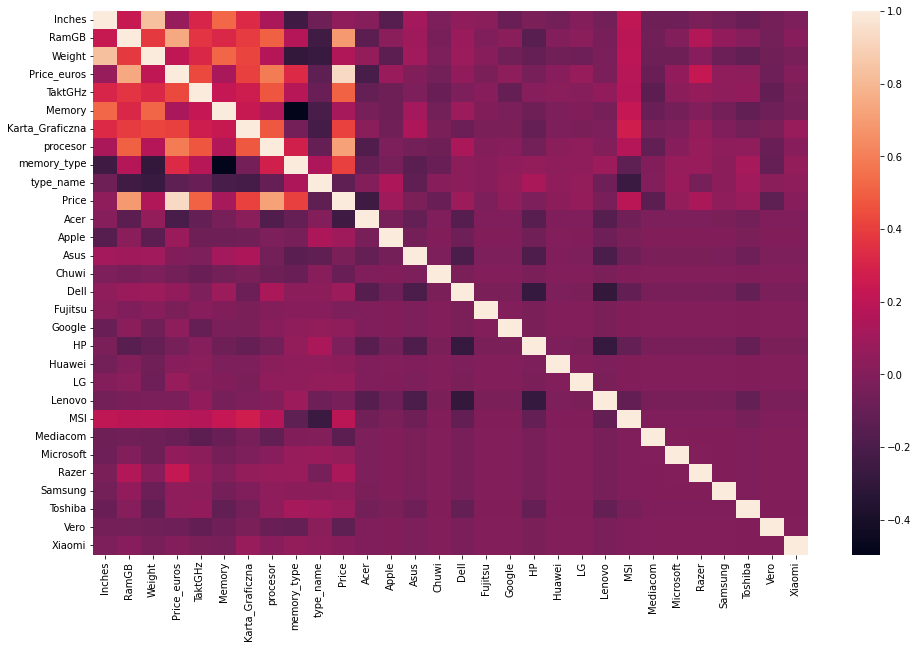

In [133]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Company', ylabel='count'>

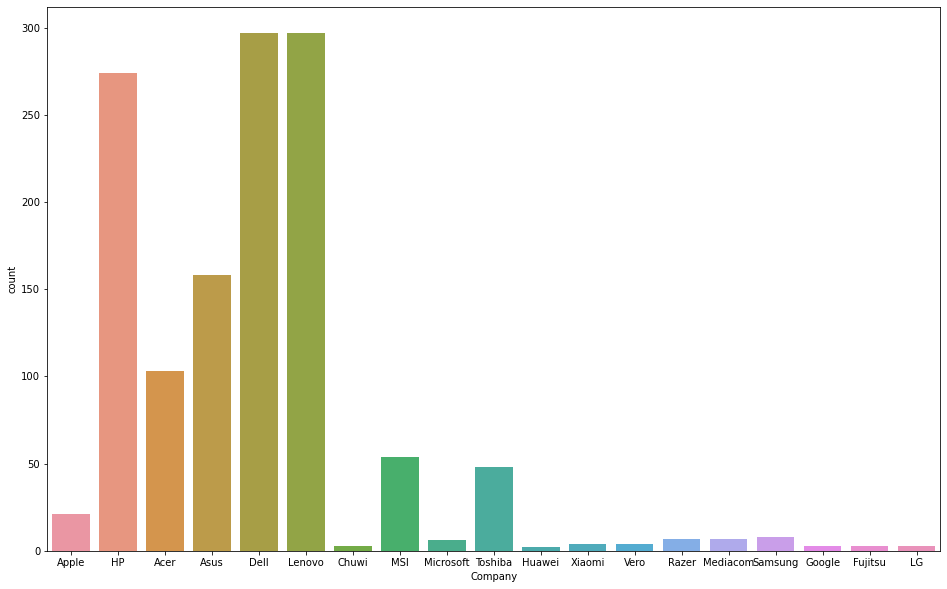

In [134]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x = 'Company')

<AxesSubplot:xlabel='RamGB', ylabel='Price_euros'>

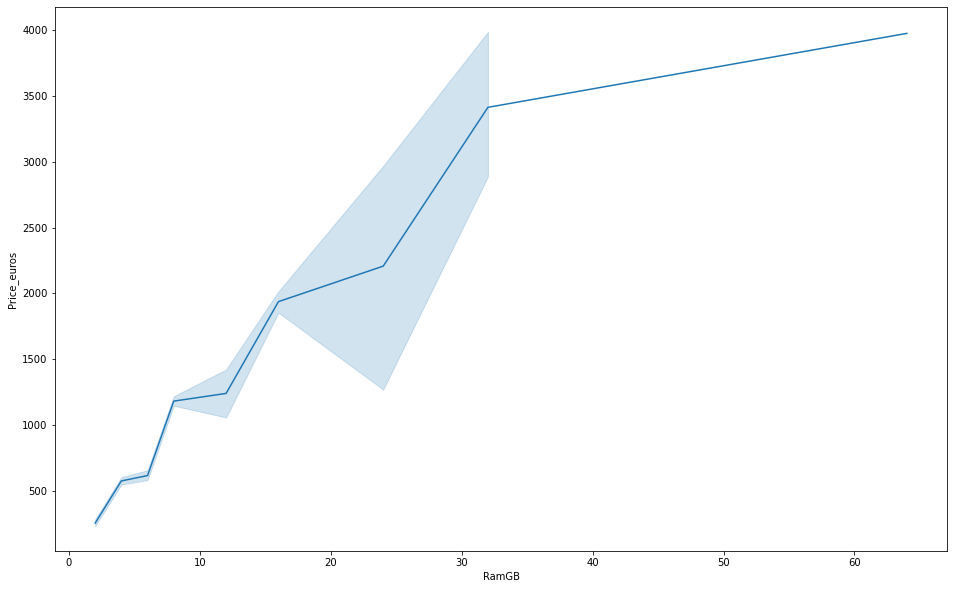

In [135]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x = 'RamGB', y = 'Price_euros')

### Model1

In [136]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,RamGB,OpSys,Weight,Price_euros,Procesor,TaktGHz,Karta Graficzna,Memory,Memory_type,Karta_Graficzna,procesor,memory_type,type_name,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1339.69,Intel Core-i5,2.3,Intel Iris,128,SSD,6,6,4,5,7.200194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,Intel Core-i5,1.8,Intel HD,128,Flash_Storage,5,6,1,5,6.801216,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,575.00,Intel Core-i5,2.5,Intel HD,256,SSD,5,6,4,4,6.354370,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,2537.45,Intel Core-i7,2.7,AMD Radeon,512,SSD,3,7,4,5,7.838915,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,1803.60,Intel Core-i5,3.1,Intel Iris,256,SSD,6,6,4,5,7.497540,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'RamGB',
       'OpSys', 'Weight', 'Price_euros', 'Procesor', 'TaktGHz',
       'Karta Graficzna', 'Memory', 'Memory_type', 'Karta_Graficzna',
       'procesor', 'memory_type', 'type_name', 'Price', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi'],
      dtype='object')

In [138]:
X1 = df[['Inches', 'RamGB', 'Weight', 'TaktGHz', 'Memory', 'Karta_Graficzna',
       'procesor', 'memory_type', 'type_name', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi']]

In [139]:
y1 = df['Price_euros']

In [140]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=123)

## Regresja liniowa

## Model1


In [141]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [142]:
predict1 = model1.predict(X_test1)

In [143]:
r2_score(y_test1, predict1)

0.7645194255346064

In [144]:
model1.coef_

array([-1.28529918e+02,  7.14002636e+01,  2.11145160e+02,  1.51629064e+02,
       -1.58955289e-03,  3.19883279e+01,  9.42374111e+01,  1.01519057e+02,
        2.86207572e+01, -3.52884370e+02,  2.50098862e+02, -1.36600148e+02,
       -5.55711764e+01, -1.56847017e+02, -4.35619662e+02,  1.20449147e+02,
       -4.51195040e+01, -6.50855965e+01,  7.57255985e+02, -1.66074705e+02,
        5.29763067e+01, -2.83454495e+02, -4.81950148e+01,  1.42858850e+03,
       -8.95560510e+01, -1.22174685e+02, -8.20298902e+01, -5.70156488e+02])

In [145]:
cdf = pd.DataFrame(model1.coef_, X1.columns, columns=['Coeffecient'])
cdf

,Coeffecient
Inches,-128.529918
RamGB,71.400264
Weight,211.145160
TaktGHz,151.629064
Memory,-0.001590
Karta_Graficzna,31.988328
procesor,94.237411
memory_type,101.519057
type_name,28.620757
Acer,-352.884370


In [146]:
model1.intercept_

651.7800034414245

In [147]:
price_model1 = df['Price_euros']
predict_price_model1 = pd.Series(predict1)
error_model1 = price_model1 - predict_price_model1
data_pedict_model1 = pd.DataFrame({'price':price_model1,
                                  'Predict_price' : predict_price_model1,
                                  'Error' : error_model1})
data_pedict_model1.head()

,price,Predict_price,Error
0,1339.69,1379.047496,-39.357496
1,898.94,29.023075,869.916925
2,575.00,460.323802,114.676198
3,2537.45,1273.450735,1263.999265
4,1803.60,1271.465966,532.134034


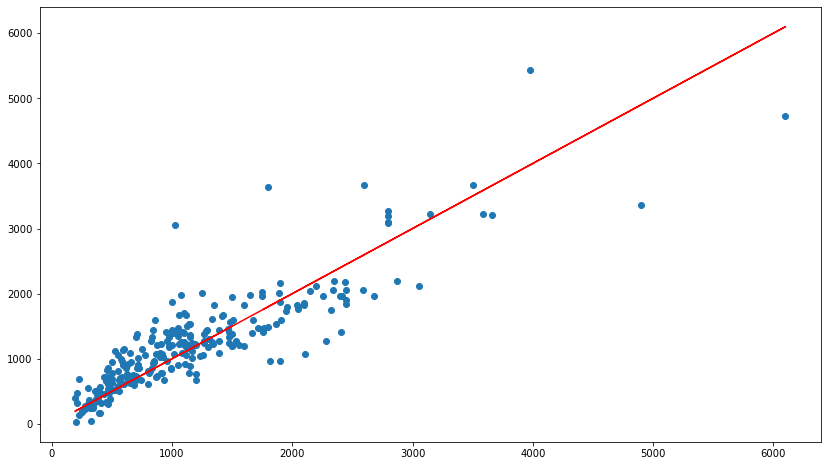

In [148]:
plt.figure(figsize=(14,8))
plt.scatter(y_test1, predict1)
plt.plot(y_test1, y_test1, color = 'red')

##  Bias, wariancja

In [149]:
import mlxtend

In [150]:
from mlxtend.evaluate import bias_variance_decomp

In [151]:
mse1, bias1, variance1= bias_variance_decomp(model1, X_train1.values, y_train1.values, X_test1.values, y_test1.values, loss='mse', random_seed=123, num_rounds=200)

In [152]:
mse1

168084.99353833022

In [153]:
bias1

152590.69070836273

In [155]:
variance1

15494.302829967417

## MAE

In [183]:
from sklearn.metrics import mean_absolute_error

In [185]:
mean_absolute_error(y_test1, predict1)

271.372403497757

## MSE

In [186]:
from sklearn.metrics import mean_squared_error

In [187]:
mean_squared_error(y_test1, predict1)

157494.37678771565

## RMSE

In [188]:
mean_squared_error(y_test1, predict1, squared=False)

396.85561201489344

## Model2 Price

In [156]:
X2 = df[['Inches', 'RamGB', 'Weight', 'TaktGHz', 'Memory', 'Karta_Graficzna',
       'procesor', 'memory_type', 'type_name', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi']]

In [157]:
y2 = df['Price']

In [158]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.2, random_state=123)

## Regresja liniowa

In [159]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [160]:
predict2 = model2.predict(X_test2)

In [161]:
r2_score(y_test2, predict2)

0.8020874373399288

In [162]:
model2.coef_

array([-9.62375215e-02,  4.94255737e-02,  9.41387536e-02,  1.99888538e-01,
        8.74995998e-05,  3.23353186e-02,  1.46961348e-01,  1.30681562e-01,
        2.97638096e-04, -2.54390467e-01,  5.27130756e-01, -2.15865745e-02,
       -2.77574447e-01, -4.53434300e-03, -2.34713318e-01,  3.25517916e-01,
        5.80924521e-02,  8.46678609e-02,  5.54055376e-01, -8.24262948e-02,
        1.12872269e-01, -4.93760751e-01,  1.59775022e-01,  1.60960433e-01,
       -6.39777629e-03,  5.42442933e-02, -3.98183486e-01, -2.63748922e-01])

In [163]:
cdf2 = pd.DataFrame(model2.coef_, X2.columns, columns=['Coeffecient'])
cdf2

,Coeffecient
Inches,-0.096238
RamGB,0.049426
Weight,0.094139
TaktGHz,0.199889
Memory,0.000087
Karta_Graficzna,0.032335
procesor,0.146961
memory_type,0.130682
type_name,0.000298
Acer,-0.254390


In [164]:
model2.intercept_

5.737555976064414

In [165]:
price_model2 = df['Price']
predict_price_model2 = pd.Series(predict2)
error_model2 = price_model2 - predict_price_model2
data_pedict_model2 = pd.DataFrame({'price':price_model2,
                                  'Predict_price' : predict_price_model2,
                                  'Error' : error_model2})
data_pedict_model2.head()

,price,Predict_price,Error
0,7.200194,7.119975,0.080218
1,6.801216,5.595219,1.205997
2,6.354370,6.041703,0.312667
3,7.838915,7.108705,0.730210
4,7.497540,7.022181,0.475359


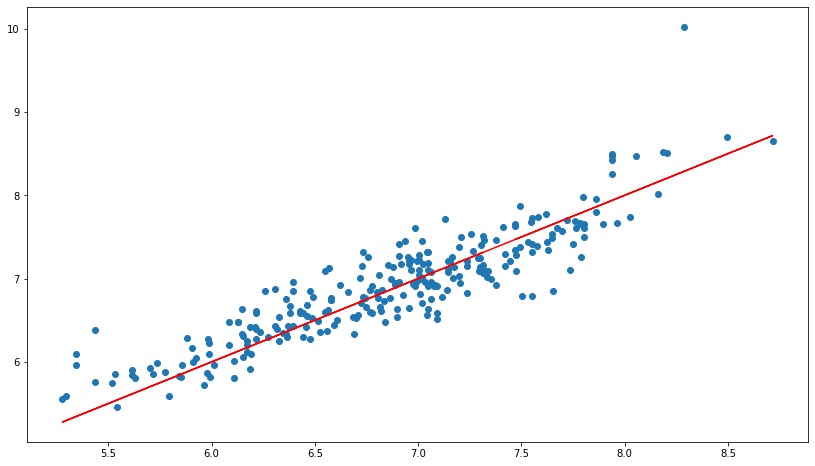

In [166]:
plt.figure(figsize=(14,8))
plt.scatter(y_test2, predict2)
plt.plot(y_test2, y_test2, color = 'red')

## Bias, wariancja

In [167]:
mse2, bias2, variance2= bias_variance_decomp(model2, X_train2.values, y_train2.values, X_test2.values, y_test2.values, loss='mse', random_seed=123, num_rounds=200)

In [168]:
mse2

0.08984706470251318

In [169]:
bias2

0.0870730942403234

In [170]:
variance2

0.002773970462189965

## MAE

In [189]:
mean_absolute_error(y_test2, predict2)

0.2261006833806362

## MSE

In [190]:
mean_squared_error(y_test2, predict2)

0.08729417211344304

## RMSE

In [191]:
mean_squared_error(y_test2, predict2, squared= False)

0.29545587168550747

## Regresja wielomianowa

## Model1

In [171]:
poly1 = PolynomialFeatures(degree=4)

In [172]:
X_train_poly1 = poly1.fit_transform(X_train1)

In [173]:
X_test_poly1 = poly1.transform(X_test1)

In [174]:
poly_model1 = LinearRegression()
poly_model1.fit(X_train_poly1, y_train1)

LinearRegression()

In [175]:
poly_predict1 = poly_model1.predict(X_test_poly1)

In [176]:
r2_score(y_test1, poly_predict1)

-42718212.1316264

In [195]:
poly_predict1

array([ 1.15109553e+04,  1.13801677e+05,  2.26582775e+04,  2.50053798e+03,
        6.23063345e+03,  1.18846447e+03,  1.72355667e+03, -4.10575540e+03,
        1.46052439e+03,  1.18088617e+04, -3.63680080e+04,  1.15109553e+04,
        4.48665927e+02,  1.11032301e+03,  1.53617294e+03,  6.06804806e+05,
       -5.27083752e+04,  1.97992681e+04, -3.70488178e+05, -4.42299882e+03,
        6.26233230e+02,  7.11781168e+02,  9.17699973e+02, -5.36191443e+02,
       -1.09027614e+04,  6.66136042e+03,  9.11317918e+03,  1.85073318e+03,
       -1.42523688e+03, -6.20814621e+05,  6.21230178e+05,  4.39723723e+03,
       -9.60130888e+03,  2.55889447e+04,  6.20127458e+02,  2.95820237e+04,
       -4.43145820e+03,  3.07086683e+02,  1.48976153e+05,  2.36569247e+04,
       -2.55303245e+03, -2.47961267e+05,  5.01593341e+03,  1.08988339e+03,
        7.28048977e+02,  3.77948310e+02,  5.67370936e+02,  6.77224259e+02,
       -1.13853161e+05,  6.74064332e+04, -2.17235771e+04, -5.36191443e+02,
       -3.35118512e+05,  

In [177]:
score_poly = poly_model1.score(X_train_poly1, y_train1)
score_poly

0.9882307889176444

In [178]:
poly_model1.coef_

array([-1.27488008e+01, -2.49025365e+01,  1.45154497e+01, ...,
        0.00000000e+00,  0.00000000e+00,  8.71493265e-10])

In [179]:
cdfpoly1 = pd.DataFrame(poly_model1.coef_, columns=['Coeffecient'])
cdfpoly1

,Coeffecient
0,-1.274880e+01
1,-2.490254e+01
2,1.451545e+01
3,7.924634e+00
4,-3.150859e+00
...,...
35955,-4.112634e-05
35956,0.000000e+00
35957,0.000000e+00
35958,0.000000e+00


In [180]:
poly_model1.intercept_

112844.6883010986

In [181]:
price_model_poly1 = df['Price_euros']
predict_price_model_poly1 = pd.Series(poly_predict1)
error_model_poly1 = price_model_poly1 - predict_price_model_poly1
data_pedict_model_poly1 = pd.DataFrame({'price':price_model_poly1,
                                  'Predict_price' : predict_price_model_poly1,
                                  'Error' : error_model_poly1})
data_pedict_model_poly1.head()

,price,Predict_price,Error
0,1339.69,11510.955330,-10171.265330
1,898.94,113801.677442,-112902.737442
2,575.00,22658.277516,-22083.277516
3,2537.45,2500.537984,36.912016
4,1803.60,6230.633453,-4427.033453


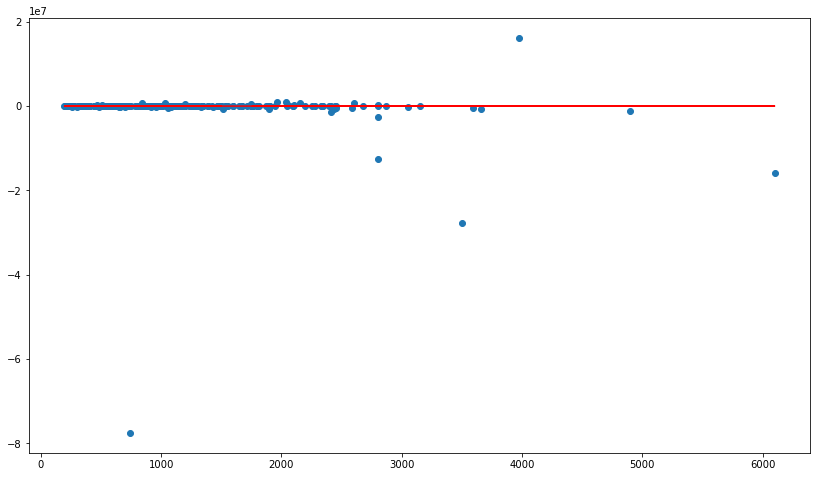

In [182]:
plt.figure(figsize=(14,8))
plt.scatter(y_test1, poly_predict1)
plt.plot(y_test1, y_test1, color = 'red')

## MAE

In [192]:
mean_absolute_error(y_test1, poly_predict1)

656287.7350805774

## MSE

In [193]:
mean_squared_error(y_test1, poly_predict1)

28570842286776.59

## RMSE

In [194]:
mean_squared_error(y_test1, poly_predict1, squared=False)

5345169.996059676

### Model2

In [196]:
poly2 = PolynomialFeatures(degree=4)

In [197]:
X_train_poly2 = poly2.fit_transform(X_train2)

In [198]:
X_test_poly2 = poly2.transform(X_test2)

In [199]:
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly2, y_train2)

LinearRegression()

In [200]:
poly_predict2 = poly_model2.predict(X_test_poly2)

In [201]:
r2_score(y_test1, poly_predict1)

-42718212.1316264

In [202]:
score_poly2 = poly_model2.score(X_train_poly2, y_train2)
score_poly2

0.9897917825705327

In [203]:
poly_model2.coef_

array([-1.47943356e-02, -2.77451334e-02,  2.52072175e-02, ...,
        0.00000000e+00,  0.00000000e+00, -7.98335062e-13])

In [204]:
cdfpoly2 = pd.DataFrame(poly_model2.coef_, columns=['Coeffecient'])
cdfpoly2

,Coeffecient
0,-1.479434e-02
1,-2.774513e-02
2,2.520722e-02
3,7.835108e-03
4,-1.192492e-03
...,...
35955,-2.560801e-08
35956,0.000000e+00
35957,0.000000e+00
35958,0.000000e+00


In [205]:
poly_model2.intercept_

89.31270794111724

In [206]:
price_model_poly2 = df['Price']
predict_price_model_poly2 = pd.Series(poly_predict2)
error_model_poly2 = price_model_poly2 - predict_price_model_poly2
data_pedict_model_poly2 = pd.DataFrame({'price':price_model_poly2,
                                  'Predict_price' : predict_price_model_poly2,
                                  'Error' : error_model_poly2})
data_pedict_model_poly2.head()

,price,Predict_price,Error
0,7.200194,13.425592,-6.225398
1,6.801216,93.507026,-86.705810
2,6.354370,23.401465,-17.047095
3,7.838915,7.822994,0.015920
4,7.497540,11.940452,-4.442912


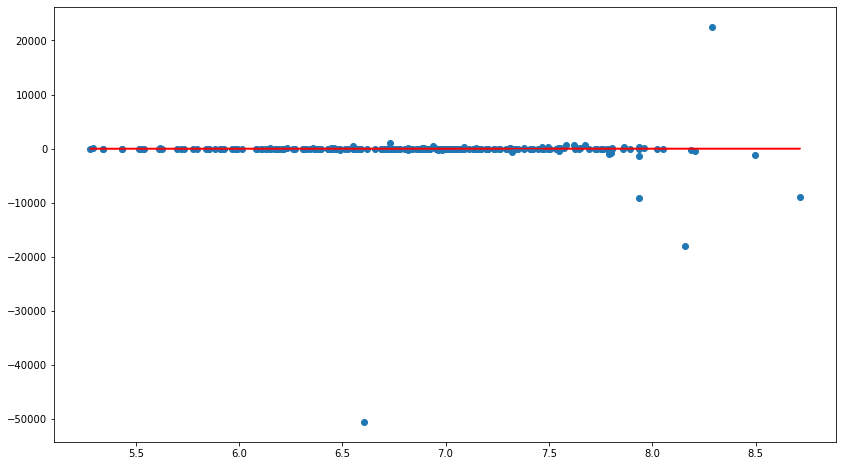

In [207]:
plt.figure(figsize=(14,8))
plt.scatter(y_test2, poly_predict2)
plt.plot(y_test2, y_test2, color = 'red')

## MAE

In [208]:
mean_absolute_error(y_test2, poly_predict2)

481.04382828749306

## MSE

In [209]:
mean_squared_error(y_test2, poly_predict2)

13629065.520282133

## RMSE

In [210]:
mean_squared_error(y_test2, poly_predict2, squared=False)

3691.7564275398954

## TreeDecisions

In [211]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
model=DecisionTreeRegressor()
model.fit(X1,y1)

DecisionTreeRegressor()

In [213]:
predict_data=model.predict(X_test1)

In [218]:
r2_score(y_test1, predict_data)

0.9961901589994272

In [219]:
model.get_depth()

27

In [220]:
model.get_n_leaves()

1088